In [63]:
import pandas as pd
import numpy as np
import requests
import urllib2, json, sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import networkx as nx
import codecs
UTF8Writer = codecs.getwriter('utf8')
sys.stdout = UTF8Writer(sys.stdout)

In [4]:
VK_API_TOKEN = 'My token was here'
VK_USER_ID = 182824801
#url  = u'https://api.vk.com/method/friends.get?fields=sex,city,education&uid=%s&lang=en&version=5.73&access_token=%s' %(VK_USER_ID ,VK_API_TOKEN)
#res  = urllib2.urlopen(url).read()
#data = json.loads( res )

In [5]:
def get_friends(user_id):
    url  = u'https://api.vk.com/method/friends.get?fields=sex,city,education&uid=%s&lang=en&version=5.73&access_token=%s' %(user_id ,VK_API_TOKEN)
    res  = urllib2.urlopen(url).read()
    data = json.loads( res )
    return pd.io.json.json_normalize(data['response'])

Let's construct a nice pandas dataframe from our JSON

In [27]:
df = get_friends(VK_USER_ID)
df.insert(0, 'is_friend_of', VK_USER_ID)

In [28]:
df.head()

,is_friend_of,city,deactivated,education_form,education_status,faculty,faculty_name,first_name,graduation,last_name,online,sex,uid,university,university_name,user_id
0,182824801,NaN,banned,NaN,NaN,NaN,NaN,Mrs,NaN,Smith,0,1,16450,NaN,NaN,16450
1,182824801,0.0,NaN,Full-time,Alumna (Bachelor's),475.0,Факультет социальных наук (Государственного и ...,Adel,2008.0,Shadrina,0,1,42727,128.0,НИУ ВШЭ (ГУ-ВШЭ),42727
2,182824801,1.0,NaN,NaN,NaN,NaN,NaN,Kirill,NaN,Gomenyuk,0,2,50385,NaN,NaN,50385
3,182824801,1.0,NaN,Full-time,Student (Bachelor's),474.0,Факультет бизнеса и менеджмента (Бизнес-информ...,Anton,2016.0,Piskunov,0,2,4411633,128.0,НИУ ВШЭ (ГУ-ВШЭ),4411633
4,182824801,0.0,NaN,Full-time,NaN,1484.0,Факультет геологии и геофизики нефти и газа,Sonya,0.0,Gogoleva,1,1,4793267,334.0,РГУ нефти и газа (НИУ) им. И. М. Губкина,4793267


In [29]:
import time
frames = [df]
# Let's get all friends for each our friend
i = 1
for item in df.uid:
    print'iteration', i
    i = i + 1
    print'friend uid', item
    try:
        new_df = get_friends(item)
        new_df.insert(0, 'is_friend_of', item)
        frames.append(new_df)
        # print the number of friends just to be sure that we are not banned on this step
        print'new request len', len(new_df)
        # VK API has a query limit - 3 queries per second, so, we better wait for 0.4 seconds after each query to be sure not to get banned
        time.sleep(0.4)
    except:
        # sometimes we can get an error if the user is banned, or if we are banned
        print('error')

iteration 1
friend uid 16450
error
iteration 2
friend uid 42727
new request len 2511
iteration 3
friend uid 50385
new request len 367
iteration 4
friend uid 4411633
new request len 744
iteration 5
friend uid 4793267
new request len 198
iteration 6
friend uid 5417191
new request len 327
iteration 7
friend uid 6093731
new request len 132
iteration 8
friend uid 6388013
new request len 510
iteration 9
friend uid 6537447
new request len 156
iteration 10
friend uid 6633765
new request len 452
iteration 11
friend uid 6805396
new request len 397
iteration 12
friend uid 6862930
new request len 624
iteration 13
friend uid 7048636
new request len 212
iteration 14
friend uid 7083123
new request len 221
iteration 15
friend uid 7321434
new request len 1205
iteration 16
friend uid 7343298
new request len 284
iteration 17
friend uid 7358127
new request len 246
iteration 18
friend uid 7422772
new request len 170
iteration 19
friend uid 7623029
new request len 596
iteration 20
friend uid 8038711
new req

Now, let's remove banned users and self from our dataframe

In [30]:
#merge all our data
result = pd.concat(frames)

In [31]:
len(result)

59680

We have length of 59680. Let's save our data to csv to not to deal with VK API again

In [32]:
result.to_csv('data.csv', encoding='utf8')

In [33]:
result

,city,deactivated,education_form,education_status,faculty,faculty_name,first_name,graduation,is_friend_of,last_name,lists,online,sex,uid,university,university_name,user_id
0,NaN,banned,NaN,NaN,NaN,NaN,Mrs,NaN,182824801,Smith,NaN,0,1,16450,NaN,NaN,16450
1,0.0,NaN,Full-time,Alumna (Bachelor's),475.0,Факультет социальных наук (Государственного и ...,Adel,2008.0,182824801,Shadrina,NaN,0,1,42727,128.0,НИУ ВШЭ (ГУ-ВШЭ),42727
2,1.0,NaN,NaN,NaN,NaN,NaN,Kirill,NaN,182824801,Gomenyuk,NaN,0,2,50385,NaN,NaN,50385
3,1.0,NaN,Full-time,Student (Bachelor's),474.0,Факультет бизнеса и менеджмента (Бизнес-информ...,Anton,2016.0,182824801,Piskunov,NaN,0,2,4411633,128.0,НИУ ВШЭ (ГУ-ВШЭ),4411633
4,0.0,NaN,Full-time,NaN,1484.0,Факультет геологии и геофизики нефти и газа,Sonya,0.0,182824801,Gogoleva,NaN,1,1,4793267,334.0,РГУ нефти и газа (НИУ) им. И. М. Губкина,4793267
5,1.0,NaN,NaN,NaN,NaN,NaN,Daniil,NaN,182824801,Korolev,NaN,0,2,5417191,NaN,NaN,5417191
6,0.0,NaN,NaN,NaN,0.0,,Dasha,0.0,182824801,Andreeva,NaN,0,1,6093731,0.0,,6093731
7,1.0,NaN,Full-time,Student (Bachelor's),484.0,Факультет экономических наук,Katya,0.0,182824801,Kolfild,NaN,0,1,6388013,128.0,НИУ ВШЭ (ГУ-ВШЭ),6388013
8,61.0,NaN,Full-time,Alumna (Specialist),2704.0,Институт экономики и менеджмента,Yulya,2008.0,182824801,Bulatova,NaN,0,1,6537447,541.0,БФУ им. Канта (бывш. РГУ им. Канта),6537447
9,1.0,NaN,NaN,NaN,NaN,NaN,Alexandra,NaN,182824801,Popova,NaN,0,1,6633765,NaN,NaN,6633765


In [6]:
data = pd.read_csv('data.csv')

In [47]:
data.loc[1000:1050]

,Unnamed: 0,city,deactivated,education_form,education_status,faculty,faculty_name,first_name,graduation,is_friend_of,last_name,lists,online,sex,uid,university,university_name,user_id
1000,847,1.0,NaN,NaN,NaN,0.0,NaN,Valeria,0.0,42727,Baraeva,NaN,0,1,2039524,0.0,NaN,2039524
1001,848,859.0,NaN,NaN,NaN,0.0,NaN,Tatyana,0.0,42727,Klevtsova,NaN,0,1,2042305,1070.0,РГСУ,2042305
1002,849,1.0,NaN,NaN,NaN,NaN,NaN,Natalya,NaN,42727,Galaktionova,NaN,0,1,2042988,NaN,NaN,2042988
1003,850,1.0,NaN,Full-time,NaN,4639.0,Факультет иностранных языков и зарубежной воен...,Max,2005.0,42727,Balabko,NaN,0,2,2044752,106.0,ВУМО РФ (бывш. ВПА им. Ленина),2044752
1004,851,157.0,NaN,NaN,NaN,NaN,NaN,Elena,NaN,42727,Pesina,NaN,0,1,2058348,NaN,NaN,2058348
1005,852,NaN,deleted,NaN,NaN,NaN,NaN,DELETED,NaN,42727,NaN,NaN,0,1,2063374,NaN,NaN,2063374
1006,853,2.0,NaN,NaN,NaN,NaN,NaN,Denis,NaN,42727,Vishnitsky,NaN,0,2,2067951,NaN,NaN,2067951
1007,854,1.0,NaN,NaN,NaN,0.0,NaN,Alexandra,0.0,42727,Malakhova,NaN,1,1,2069582,0.0,NaN,2069582
1008,855,151.0,NaN,NaN,NaN,NaN,NaN,Natalya,NaN,42727,Ibragimova,NaN,0,1,2072964,NaN,NaN,2072964
1009,856,1.0,NaN,Full-time,Alumnus (Master's),1173.0,Факультет кибернетики и информационной безопас...,Sergey,2006.0,42727,Zhikharev,NaN,0,2,2076289,269.0,НИЯУ МИФИ,2076289


Now we surely saved our raw friends data to csv.

In [52]:
my_friends = list(data[data.is_friend_of == VK_USER_ID].uid)

In [49]:
friends = data[data.is_friend_of == 14045314]
uids = list(friends.uid)

In [51]:
mutual = []
for item in my_friends:
    if item in uids:
        mutual.append(item)
        
mutual

[4793267,
 6388013,
 7343298,
 8954930,
 24676142,
 30135950,
 52217140,
 55010019,
 99232652,
 157188286,
 215563351]

In [75]:
# let's build a graph
np_df = data.as_matrix()
G = nx.Graph()
friends = []
for item in np_df:
    user_id = item[14] # user id
    if (user_id in my_friends):
        if not G.has_node(user_id):
            G.add_node(user_id)
        from_id = item[9] # is friend of
        friends.append(user_id)
        if from_id != VK_USER_ID:
            G.add_edge(from_id, user_id)

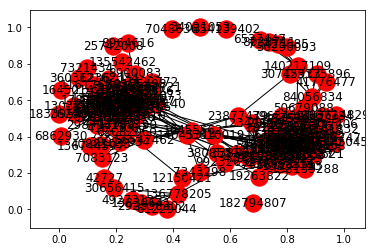

In [76]:
nx.draw_networkx(G)

In [79]:
#take all nodes with degree >= 20
G1 = G
for node in G1.nodes():
    if G1.degree(node) < 20:
        G1.remove_node(node)

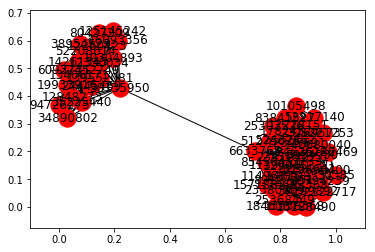

In [80]:
nx.draw_networkx(G1)

We can clearly see here two main groups

In [66]:
nx.write_graphml(G, 'graph.graphml')

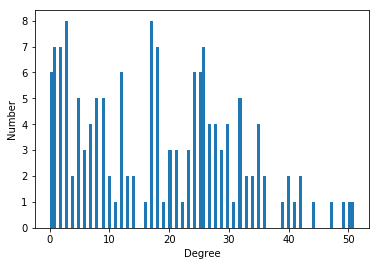

In [64]:
degrees_dictionary = nx.degree(G)
degrees = np.array(degrees_dictionary.values())

# show node degrees
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(degrees, 100)
plt.show()

Not even close to power law

In [81]:
len(G.nodes())

57

In [82]:
nx.radius(G)

2

In [83]:
nx.diameter(G)

4

In [84]:
nx.clustering(G)

{50385: 0.7843137254901961,
 6093731: 0.8461538461538461,
 6633765: 0.687192118226601,
 8545045: 0.717391304347826,
 8954930: 0.7116935483870968,
 10105498: 0.9005847953216374,
 10304893: 0.8857142857142857,
 11397480: 0.717948717948718,
 11496815: 0.7133333333333334,
 12228151: 0.7866666666666666,
 12260423: 0.8761904761904762,
 12330034: 0.8169934640522876,
 12395691: 0.735632183908046,
 12848273: 0.8333333333333334,
 12904533: 0.7032258064516129,
 13338368: 0.8047619047619048,
 13466171: 0.7894736842105263,
 14261343: 0.803921568627451,
 16093356: 0.9743589743589743,
 16188490: 0.7602339181286549,
 16254641: 0.701058201058201,
 17824573: 0.7644927536231884,
 18463372: 0.7835497835497836,
 19933916: 0.8666666666666667,
 20794239: 0.7318840579710145,
 22452749: 0.803921568627451,
 23380109: 0.75,
 23412402: 0.6789915966386555,
 23769573: 0.7833333333333333,
 24445469: 0.7843137254901961,
 24676142: 0.6946236559139785,
 25221253: 0.7733333333333333,
 25303526: 0.8063241106719368,
 2536

In [86]:
np.mean(degrees_dictionary.values())

18.313725490196077

In [87]:
np.std(degrees_dictionary.values())

12.893972137912808